# Sahraj Singh




## Research question/interests

With this research project I plan to identify trends based on age, race, gender, location and other important factors such as if the victims showed signs of mental illness in police shooting scenarios in the United States of America from 2015-2022. By analysing this data we can find patterns in shootings and the general response of the police towards the public. This analysis can help identify where reform is required and act as groundwork to bring said reform. My goal for this project is to  find the most safe and unsafe circumstances for the general public in terms of police shootings.

My research questions are: 
1. Is there a difference between the ratio of threatening and non-threat victims of each race?
1. Has treatement of different races by the police changed through the years?
1. Are some areas(states) safer than others for people of different races?

## Task 1: Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime

### Preview of the dataset:

In [ ]:
raw_df= pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
raw_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False,-111.584,35.224,True
7725,7726,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False,-86.472,33.775,True
7726,7727,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False,-90.290,38.668,True
7727,7728,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False,-82.539,36.309,True


This dataset contains 7729 rows and 17 columns

### Below are the columns of our raw dataset: 

In [ ]:
raw_df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

This is a list of the parameters that we will be working with or building on in this analysis.

### Number of uniquie values in each column:


In [ ]:
raw_df.nunique(axis=0)

id                         7729
name                       7280
date                       2620
manner_of_death               2
armed                       104
age                          81
gender                        2
race                          6
city                       3148
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  6031
latitude                   5330
is_geocoding_exact            2
dtype: int64

### Number of non null values in each column:

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

By comparing the previous 2 tables we can make some basic deductions. Firstly the number of null values are low which indicates a relatively complete dataset. There are 7312 names in the "Name" column but only 7280 unique names. This means, 32 victims share the same name as other victims. Also, there are 2,620 unique dates in a timespan of 2,922 days. This means there were 300 days from 2015-2022 with no reported shootings.

### Removing all null values

In [ ]:
raw_df.dropna(axis = 0, inplace = True)
print(f"After dropping all null values, the shape of the Dataset is {raw_df.shape}")
print(f"Status of null values after dropping all null values :")
raw_df.isna().sum().to_frame()

After dropping all null values, the shape of the Dataset is (5070, 17)
Status of null values after dropping all null values :


,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,0
gender,0
race,0
city,0
state,0


Over 2000 rows with null values have been dropped. Now, we can move forward to morphing the dataset to suit our anaylsis.

## Task 2 - Data Analysis Pipeline

First, I will remove all rows where geocoding is not exact as it can hinder with the analysis.

In [ ]:
raw_df = raw_df[raw_df['is_geocoding_exact'] == True]
raw_df.nunique(axis=0)

id                         5061
name                       5052
date                       2153
manner_of_death               2
armed                        94
age                          76
gender                        2
race                          6
city                       2303
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  4558
latitude                   4192
is_geocoding_exact            1
dtype: int64

Next, I will remove the columns that are not required.

In [ ]:
clean_df = raw_df.drop(['id', 'name', 'manner_of_death','city','signs_of_mental_illness','is_geocoding_exact', 'body_camera'], axis=1)


Now, I will format the dataset.

In [ ]:
clean_df["date"] = pd.to_datetime(clean_df["date"])
clean_df["Year"] = clean_df["date"].dt.year
clean_df["gender"].replace({"M":"Male", "F":"Female"}, inplace = True)
clean_df["race"].replace({"W":"White", "B":"Black", "H":"Hispanic", "A":"Asian", "N":"Native", "O":"Other"}, inplace = True)
clean_df["threat_level"].replace({"attack":"Attack", "other":"Other", "undetermined":"Other"}, inplace = True)
clean_df.rename(columns={"date": "Date","armed":"Armed","age":"Age","gender":"Gender","race":"Race","state": "State","threat_level":"Threat Level","flee":"Flee","longitude":"Longitude","latitude":"Latitude"}, inplace = True)
clean_df = clean_df[["Date","Year", "State","Age","Gender","Race","Armed","Threat Level","Flee","Longitude","Latitude"]]

I have grouped together victims whose threat levels were "other" or "undetermined" to measure against those with "attack" threat levels.

### Here is a preview of our final dataset after processing:

In [ ]:
clean_df

,Date,Year,State,Age,Gender,Race,Armed,Threat Level,Flee,Longitude,Latitude
0,2015-01-02,2015,WA,53.0,Male,Asian,gun,Attack,Not fleeing,-123.122,47.247
1,2015-01-02,2015,OR,47.0,Male,White,gun,Attack,Not fleeing,-122.892,45.487
2,2015-01-03,2015,KS,23.0,Male,Hispanic,unarmed,Other,Not fleeing,-97.281,37.695
3,2015-01-04,2015,CA,32.0,Male,White,toy weapon,Attack,Not fleeing,-122.422,37.763
4,2015-01-04,2015,CO,39.0,Male,Hispanic,nail gun,Attack,Not fleeing,-104.692,40.384
...,...,...,...,...,...,...,...,...,...,...,...
7473,2022-06-10,2022,TN,38.0,Male,White,gun,Other,Not fleeing,-82.155,36.335
7492,2022-06-18,2022,OR,24.0,Male,Black,gun,Other,Car,-122.609,45.436
7500,2022-06-19,2022,NM,58.0,Male,Black,toy weapon,Other,Not fleeing,-106.649,35.085
7691,2022-08-27,2022,WV,50.0,Male,White,gun,Attack,Not fleeing,-81.586,38.334


In [ ]:
clean_df.to_csv('clean_A1.csv', encoding='utf-8', index=False)

## Task 3 - Merthod Chaining

In [ ]:
from project_functions1 import as p1
df = p1.load_n_process("../data/US Police shootings in from 2015-22 2.csv")
df

SyntaxError: invalid syntax (1910380020.py, line 1)

## Task 4 - Data Analysis

I will start by analysing some basic statistics before jumping into how they correlate. To begin, let's compare the percentages of victims by threat level.

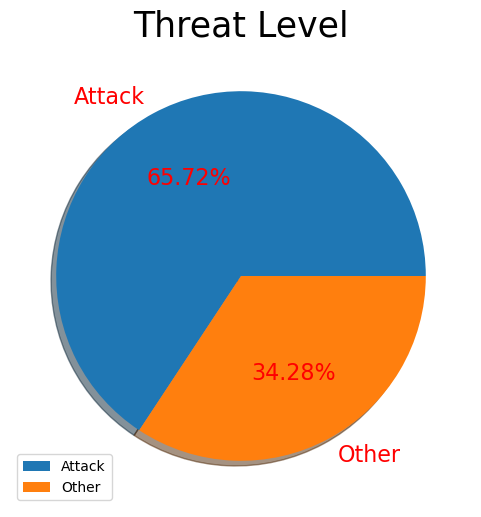

Attack    3326
Other     1735
Name: Threat Level, dtype: int64


In [ ]:
plt.figure(figsize=(6,6))
plt.pie(clean_df["Threat Level"].value_counts(), labels=['Attack', 'Other'],autopct='%1.2f%%', shadow = True,textprops=dict(size= 16, color= "red"))
plt.title("Threat Level",fontsize=25)
plt.legend()
plt.show()
print(clean_df["Threat Level"].value_counts())


This pie chart shows that about 65% of the ploice shooting victims were deemed "Attack" level threats while about 35% were not attcking during the incident.

Next, a plot showcasing count of shootings by race.

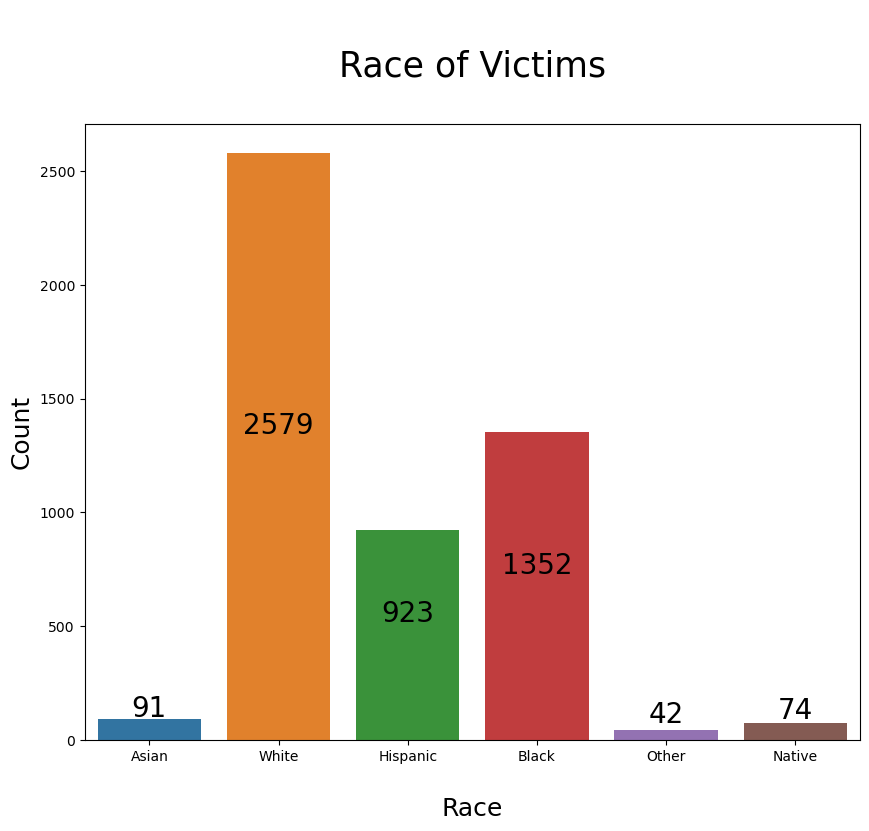

In [ ]:

plt.subplots(figsize=(10, 8))
p=sns.countplot(x=clean_df["Race"])
p.axes.set_title("\nRace of Victims\n",fontsize=25)
p.axes.set_xlabel("\nRace",fontsize=18)
p.axes.set_ylabel("Count",fontsize=18)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=15,size=20,color="black")


plt.show()


Here, we can see that the highest number of victims were white. This can be explained by the higher population of white people in the country. Black people were the second most targeted by a significant margin  and hispanic people where third but this drop in counts does not correspond with the much larger drop in populations. Asian people, Native peoples, and people belonging to other races showed drastically lower numbers. One reason for this is lower populations. However, more information on this trend will be gathered further. 

Now, we can combine the data used in the previous two plots to compare counts of "Attack" vs. "Other" threat level victims for each race.

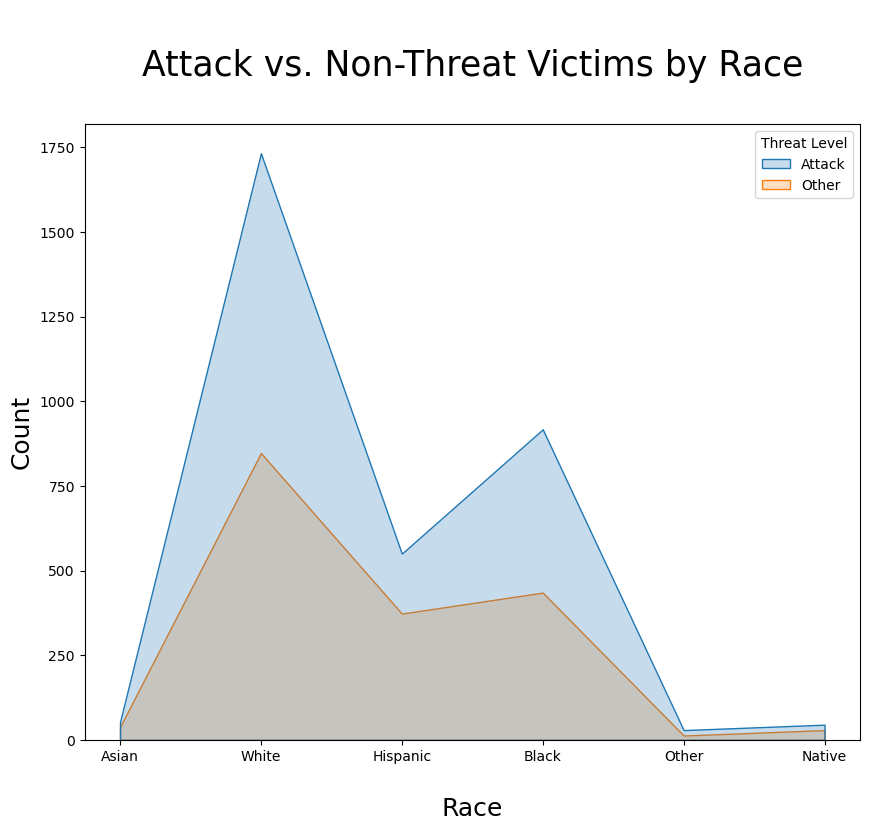

In [ ]:

plt.subplots(figsize=(10, 8))
p=sns.histplot(clean_df, x="Race", hue="Threat Level", element="poly",)
p.axes.set_title("\nAttack vs. Non-Threat Victims by Race\n",fontsize=25)
p.axes.set_xlabel("\nRace",fontsize=18)
p.axes.set_ylabel("Count",fontsize=18)
plt.savefig("A1-1.png", dpi=300, bbox_inches='tight',facecolor="white")

plt.show()


Through this plot we can make a few deductions:
   1. Asian people, Native peoples, and people belonging to other races show very little difference in "Attack" vs. "Other" threat level victims. Since about 65% of victims are attackers, this could explain why victim counts for these races are comparatively low.
   1. White people have ratio of number of attackers to other victims. This could either mean that a higher number of non-threat white people do not become victims of police shootings compared to other races, or that white people have a higher probability of being an "Attack" level threat.
   1. Hispanic people have a small ratio of number of attackers to other victims. From this information we can deduce that unarmed Hispanic people have a higher probability of becoming victims than unarmed people of the other races.

Next, a comparison of number of shootings for each year from 2015-2022 based on race.

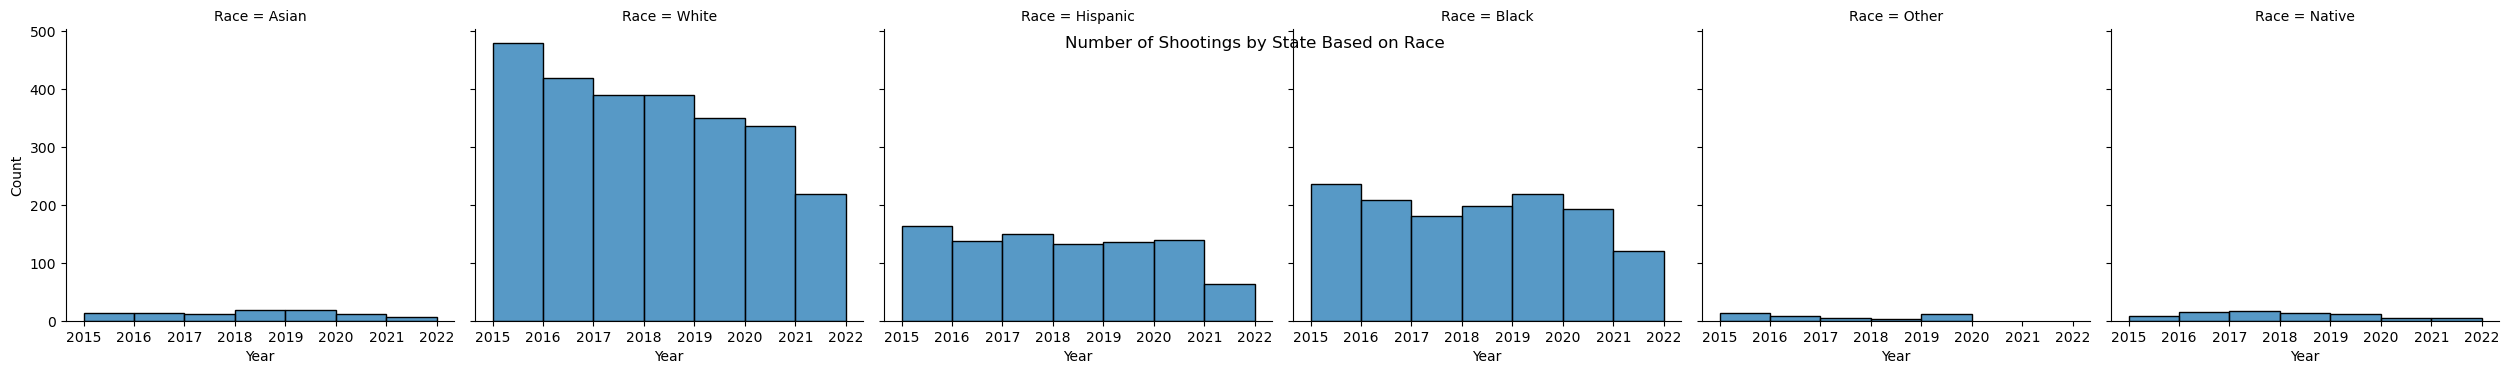

In [ ]:
g = sns.FacetGrid(clean_df, col="Race",height=3.5, aspect=1.2)
g.map(sns.histplot, "Year",binwidth=1)
g.fig.subplots_adjust(top=1)
g.fig.suptitle('Number of Shootings by State Based on Race')
plt.savefig("A1-2.png", dpi=300, bbox_inches='tight',facecolor="white")


Here, we can see:
1. Number of asian victims, native victims, and people belonging to "Other" races remained somewhat contant through the years.
1. Number of white victims reduced gradually but significantly from 2015-2022.
1. Number of Black and Hispanic victims remained somewhat constant up until 2021 and reduces slightly in 2022. This can be explained by the COVID-19 pandemic.

Next I will explore the number of shootings per state on the basis of race. 

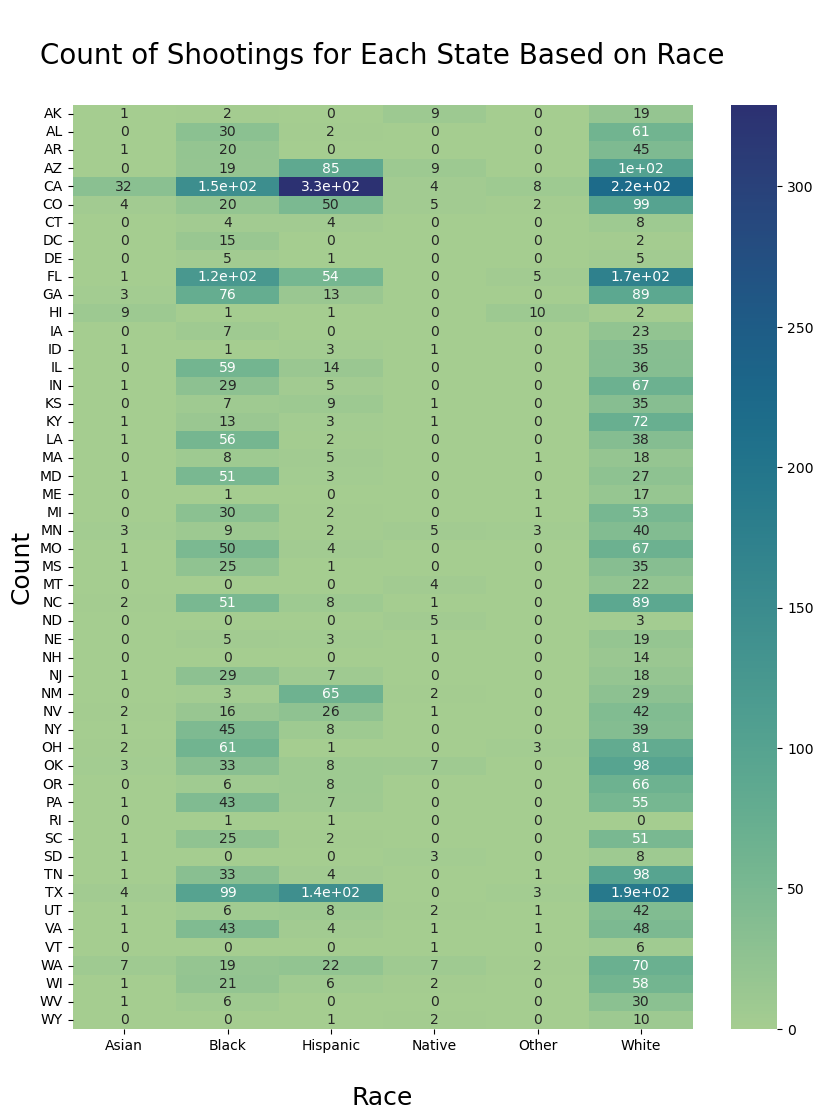

In [ ]:
state_race=pd.crosstab(clean_df['State'],clean_df['Race'])

plt.subplots(figsize=(10, 12))
p=sns.heatmap(state_race, xticklabels=True, yticklabels=True, annot=True, cmap="crest")
p.axes.set_title("\nCount of Shootings for Each State Based on Race\n",fontsize=20)
p.axes.set_xlabel("\nRace",fontsize=18)
p.axes.set_ylabel("Count",fontsize=18)
plt.savefig("A1-3.png", dpi=300, bbox_inches='tight',facecolor="white")
plt.show()


The plot shows that:
1. California and Texas have an unnaturaly high number of Hispanic victims.
1. Los Angeles and Maryland have more black victims that white victims which completely goes against the trend of population within these communities.
1. Rhode Island, the state with the lowest number of shootings only has Black and Hispanic victims.

## Conclusion

**Is there a difference between the ratio of threatening and non-threat victims of each race?**

Yes, white people have the highest ratio of "Attack" level to non-attack level victims. Black people come second and hispanic people third in that regard. This indicates that Black and Hispanic people have a higher probability of being victmized while not being a threat. Asian people, Native peoples, and people belonging to other races showed even lower ratios, this could be due to differences in culture.   

**Has treatement of different races by the police changed through the years?**

Number of white victims involved in police shootings saw a gradual yet significant decrease throughout the time-period.
Number of victims of all other races remained somewhat constant except in 2022 where we saw a significant decrease in the number of shootings in general. This can be explained by the COVID-19 pandemic.

**Are some areas(states) safer than others for people of different races?**

Yes, Claifornia and Texas are comparatively unsafe for Hispanic people, Los Angeles and Maryland are comparatively unsafe for black people and Rhode Island, the state with the lowest number of shootings only had black and hispanic victims. A trend of targetting people of colour can be seen in certain states that goes completely against intuition based on the populations of these races in the state.